## SurfinPy

#### Tutorial 5 - Chemical Potential vs Chemical Potential Including Vibration Properties

In the Tutorial 2 we showed how experimental data could be used to determine the temperature dependent free energy term for gaseous species and then plot a phase diagram that represents 298 K.  In this example we will expand this methodology to calculate the vibrational properties for solid phases (<i>i.e.</i> zero point energy, vibrational entropy) and include these values in the generation of the phase diagrams.  This allows for a more accurate calculation of phase diagrams without the need to include experimental corrections for solid phases.

##### Methodoloy

As with tutorial 2 for gaseous species, the standard free energy varies significantly with temperature, and as DFT simulations are designed for condensed phase systems, we use experimental data to determine the temperature dependent free energy term for gaseous species obtained from the NIST database.  In addition we also calculate the vibrational properties for the solid phases modifying the free energy (G) for solid phases to be;

\begin{align}
\Delta G_f = U_0 + U_{\text{ZPE}} +A_{\text{vib}}
\end{align}

$U_0$ is the calculated internal energy from a DFT calculation, $U_{\text{ZPE}}$ is the zero point energy and $S_{\text{vib}}$ is the vibrational entropy.

\begin{align}
	U_{\text{ZPE}} = \sum_i^{3n} \frac{R \theta_i}{2}
\end{align}



where $A_{\text{vib}}$ is the vibrational Helmholtz free energy and defined as;

\begin{align}
	A_{\text{vib}} = \sum_i^{3n} RT \ln{(1-e^{-\theta_i/T})}
\end{align}


3n is the total number of vibrational modes, n is the number of species and $\theta_i$ is the characteristic vibrational temperature (frequency of the vibrational mode in Kelvin).

\begin{equation}
	\theta_i = \frac{h\nu_i}{k_B}
\end{equation}

##### code

In [2]:
import matplotlib.pyplot as plt
from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import data

In [3]:
temperature_range = [298, 299]

SurfinPy has the function to calculate the zero point energy and the vibrational entropy when entropy and zpe = True.

In [4]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10, file = 'ref_files/bulk_vib.yaml', entropy=True, zpe=True, temp_range=temperature_range)

In addition to entropy and zpe keyword you must provide the a file containing the vibrational modes and number of formula units used in taht calculations.  You must create the yaml file using the following format

```
    F-Units : number
    Frequencies : 
    - mode1
    - mode2
              
```

Vibrational modes can be calculated via a density functional pertibation calculation or via the phonopy code.



In [5]:

Bulk = data.DataSet(cation = 10, x = 0, y = 0, energy = -92, 
                   label = "Bulk", entropy = True, zpe=True, file = 'ref_files/bulk_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

A = data.DataSet(cation = 10, x = 5, y = 20, energy = -468, 
                   label = "A", entropy = True, zpe=True, file = 'ref_files/A_vib.yaml', 
                   funits = 5, temp_range=temperature_range)

B = data.DataSet(cation = 10, x = 0, y = 10, energy = -228, 
                   label = "B", entropy = True, zpe=True, file = 'ref_files/B_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

C = data.DataSet(cation = 10, x = 10, y = 30, energy = -706, 
                   label = "C", entropy = True, zpe=True, file = 'ref_files/C_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

D = data.DataSet(cation = 10, x = 10, y = 0, energy = -310, 
                   label = "D", entropy = True, zpe=True,  file = 'ref_files/D_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

E = data.DataSet(cation = 10, x = 10, y = 50, energy = -972, 
                   label = "E", entropy = True, zpe=True, file = 'ref_files/E_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

F = data.DataSet(cation = 10, x = 8, y = 10, energy = -398, 
                   label = "F", entropy = True, zpe=True, file = 'ref_files/F_vib.yaml', 
                   funits =  2, temp_range=temperature_range)

In [6]:
data = [Bulk, A, B, C,  D, E, F]

In [7]:
x_energy=-20.53412969
y_energy=-12.83725889

In [8]:
CO2_exp = ut.fit_nist("ref_files/CO2.txt")[298]
Water_exp = ut.fit_nist("ref_files/H2O.txt")[298]

CO2_corrected = x_energy + CO2_exp
Water_corrected = y_energy + Water_exp

deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaY = {'Range': [ -1, 0.6], 'Label': 'H_2O'}

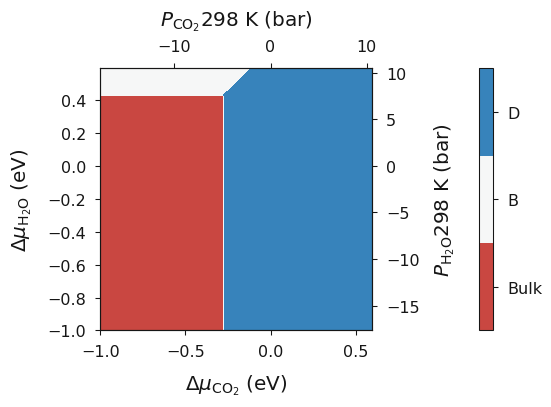

In [10]:
temp_298 = bmvm.calculate(data, bulk, deltaX, deltaY, CO2_corrected, Water_corrected)
ax = temp_298.plot_mu_p(temperature=298, colourmap="RdBu", figsize=(6, 4.5))
